
Variational Quantum Circuit:
     ┌─────────┐     
q_0: ┤ Ry(π/4) ├──■──
     ├─────────┤┌─┴─┐
q_1: ┤ Ry(π/3) ├┤ X ├
     └─────────┘└───┘


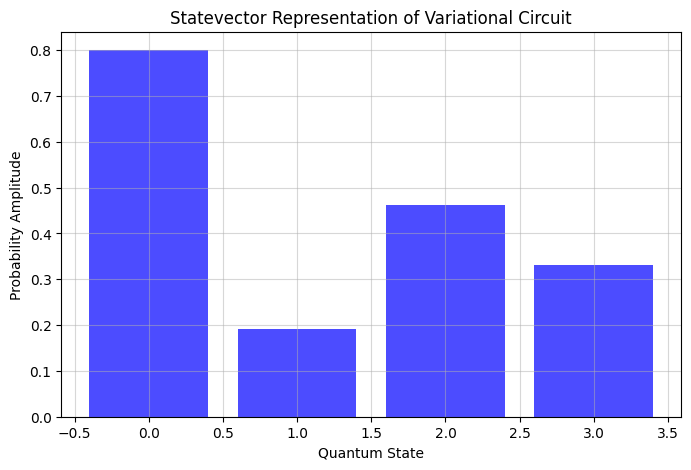

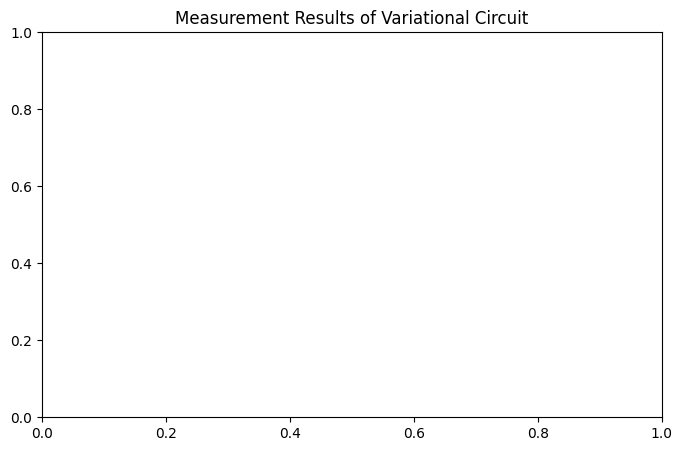

In [1]:
#-------------------------------------------------------------------------
# Quantum Variational Circuit for ML with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer, plot_histogram

#-------------------------------------------------------------------------
# Visualization Functions
# Quantum Circuit Diagram:    Shows how data is encoded into quantum states.
# Statevector Representation: Probability amplitudes of the quantum states
# Measurement Histogram:      Outcome distribution after measurement
#-------------------------------------------------------------------------
 
def plot_quantum_circuit(qc):
    """ Function to plot quantum circuit """
    print("\nVariational Quantum Circuit:")
    print(qc)
    circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'}) 

#-------------------------------------------------------------------------    
def simulate_statevector(qc):
    """ Function to visualize the statevector """
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    statevector = result.get_statevector()
    
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(statevector)), np.abs(statevector), color='blue', alpha=0.7)
    plt.xlabel("Quantum State")
    plt.ylabel("Probability Amplitude")
    plt.title("Statevector Representation of Variational Circuit")
    plt.grid(alpha=0.5)
    plt.show()

#-------------------------------------------------------------------------
def measure_and_plot(qc):
    """ Function to measure qubits and show probability distribution """
    qc_measure = qc.copy()
    qc_measure.measure_all()
    
    backend = Aer.get_backend('aer_simulator')
    job = execute(qc_measure, backend, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results of Variational Circuit")
    plt.show()

#-------------------------------------------------------------------------
# Create a variational quantum circuit
#-------------------------------------------------------------------------
def variational_circuit(params):
    qc = QuantumCircuit(2)
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)
    qc.cx(0, 1)
    return qc

# Example parameters
params = [np.pi / 4., np.pi / 3.]
circuit = variational_circuit(params)
    
#-------------------------------------------------------------------------
# Execute Visualizations
#-------------------------------------------------------------------------
plot_quantum_circuit(circuit)
simulate_statevector(circuit)
measure_and_plot(circuit)
